Exploratory Data Analysis


In [10]:
!py -m pip install pandas
!py -m pip install numpy
!py -m pip install matplotlib
!py -m pip install spacy

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.8/7.8 MB 20.0 MB/s eta 0:00:00
     ---------------------------------------- 106.9/106.9 KB ? eta 0:00:00
     ------------------------------------- 211.8/211.8 KB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 27.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 28.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-3.8.2-cp39-cp39-win_amd64.whl (12.3 MB)
     -------------------------------------- 183.0/183.0 KB 5.6 MB/s eta 0:00:00
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
     -------------------------------------- 457.0/457.0 KB 7.2 MB/s eta 0:00:00
  Using cached preshed-3.0.9-cp39-cp39-win_amd64.whl (122 kB)
     ---------------------------------------- 44.9/44.9 KB 2.2 MB/s eta 0:00:00
  Using cached weasel-0.4.1-py3-none-any.whl (50 kB)
  Using cached thinc-8.3.2-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached srsly-2.4.8-cp39-cp39-win_amd64.whl (483 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
     ---------------------------------------- 5.4/5.4 MB 28.6 MB/s eta 0:00:00
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
     ------

You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import random
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
nlp = spacy.cli.download('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
df = pd.read_csv("spam_Emails_data.csv")
df

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [50]:
df = df.drop_duplicates()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [51]:
df.isnull().any()

review       False
sentiment    False
dtype: bool

In [52]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data Preprocessing

In [53]:
df = pd.DataFrame(df)
df.shape

(49582, 2)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


Preprocessing with spacy

In [28]:
nlp = spacy.load("en_core_web_sm")
# Function to clean text by removing special characters and stopwords
def clean_text(text):
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Process the text with spaCy to remove stopwords
    doc = nlp(text)
    filtered_words = [token.text for token in doc if not token.is_stop]
    return ' '.join(filtered_words)

# Apply text cleaning to each specified column
columns_to_process = ['review']
for column in columns_to_process:
    df[column] = df[column].astype(str).apply(clean_text)

df.head()


,review,sentiment
0,reviewers mentioned watching 1 Oz episode ll h...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically s family little boy Jake thinks s zo...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


In [47]:
df.head()

,sentiment
0,positive
1,positive
2,positive
3,positive
4,positive


In [54]:
import re
import spacy
from tqdm import tqdm  # For progress tracking

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Function to clean text by removing special characters, stopwords, and applying lemmatization
def clean_text(text):
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Retain only letters and spaces
    # Process the text with spaCy
    doc = nlp(text.lower())  # Convert to lowercase
    # Filter tokens: Remove stopwords and apply lemmatization
    filtered_words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(filtered_words)

# Apply text cleaning to each specified column using spaCy's nlp.pipe for batch processing
columns_to_process = ['review']
for column in columns_to_process:
    tqdm.pandas()  # Enable progress bar for apply function
    df[column] = df[column].astype(str).progress_apply(clean_text)

# Display the first few rows of the cleaned DataFrame
df.head()


100%|██████████| 49582/49582 [38:05<00:00, 21.69it/s]  


,review,sentiment
0,reviewer mention watch oz episode ll hook righ...,positive
1,wonderful little production br br filming tech...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically s family little boy jake think s zom...,negative
4,petter matteis love time money visually stunni...,positive


In [55]:
df["sentiment"].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [56]:
# Separate the classes
positive = df[df['sentiment'] == 'positive']
negative = df[df['sentiment'] == 'negative']

# Downsample the majority class (positive or negative)
if len(positive) > len(negative):
    positive_downsampled = positive.sample(len(negative), random_state=42)
    balanced_df = pd.concat([positive_downsampled, negative])
else:
    negative_downsampled = negative.sample(len(positive), random_state=42)
    balanced_df = pd.concat([positive, negative_downsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced sentiment counts
print(balanced_df['sentiment'].value_counts())


sentiment
positive    24698
negative    24698
Name: count, dtype: int64


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=500, stop_words='english')  # Set max_features as needed

# Fit and transform the 'review' column
tfidf_matrix = tfidf.fit_transform(df['review'])

# Convert the TF-IDF matrix to a dense array (optional)
tfidf_array = tfidf_matrix.toarray()

# Create a DataFrame for the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())


   able  absolutely  act   acting    action     actor  actress  actually  add  \
0   0.0         0.0  0.0  0.00000  0.000000  0.000000      0.0       0.0  0.0   
1   0.0         0.0  0.0  0.00000  0.000000  0.106781      0.0       0.0  0.0   
2   0.0         0.0  0.0  0.00000  0.000000  0.000000      0.0       0.0  0.0   
3   0.0         0.0  0.0  0.00000  0.000000  0.000000      0.0       0.0  0.0   
4   0.0         0.0  0.0  0.09824  0.105257  0.000000      0.0       0.0  0.0   

   age  ...      work     world     worth     write  writer  wrong      year  \
0  0.0  ...  0.000000  0.000000  0.000000  0.000000     0.0    0.0  0.000000   
1  0.0  ...  0.000000  0.000000  0.140917  0.132069     0.0    0.0  0.000000   
2  0.0  ...  0.000000  0.000000  0.000000  0.000000     0.0    0.0  0.124444   
3  0.0  ...  0.000000  0.000000  0.000000  0.000000     0.0    0.0  0.000000   
4  0.0  ...  0.082212  0.100314  0.000000  0.000000     0.0    0.0  0.000000   

   yes    young    zombie  
0  0

In [58]:
# Ensure the TF-IDF DataFrame and balanced dataset are aligned
balanced_reviews = balanced_df['review']

# Refit and transform the reviews in the balanced dataset
tfidf_balanced_matrix = tfidf.fit_transform(balanced_reviews)

# Convert to dense array and create a TF-IDF DataFrame
tfidf_balanced_array = tfidf_balanced_matrix.toarray()
tfidf_balanced_df = pd.DataFrame(tfidf_balanced_array, columns=tfidf.get_feature_names_out())

# Add the sentiment labels back to the final dataset
tfidf_balanced_df['sentiment'] = balanced_df['sentiment'].values

# Display the final dataset
print(tfidf_balanced_df.head())


   able  absolutely  act  acting    action     actor  actress  actually  \
0   0.0         0.0  0.0     0.0  0.000000  0.000000      0.0  0.026191   
1   0.0         0.0  0.0     0.0  0.459359  0.000000      0.0  0.000000   
2   0.0         0.0  0.0     0.0  0.000000  0.069171      0.0  0.000000   
3   0.0         0.0  0.0     0.0  0.000000  0.000000      0.0  0.000000   
4   0.0         0.0  0.0     0.0  0.000000  0.000000      0.0  0.000000   

        add  age  ...     world  worth    write    writer     wrong      year  \
0  0.032739  0.0  ...  0.028140    0.0  0.02845  0.000000  0.033311  0.023500   
1  0.000000  0.0  ...  0.000000    0.0  0.00000  0.000000  0.000000  0.000000   
2  0.000000  0.0  ...  0.169285    0.0  0.00000  0.000000  0.000000  0.000000   
3  0.000000  0.0  ...  0.000000    0.0  0.00000  0.000000  0.000000  0.143203   
4  0.000000  0.0  ...  0.000000    0.0  0.00000  0.209162  0.000000  0.000000   

   yes     young  zombie  sentiment  
0  0.0  0.082074     0.0

In [34]:
!py -m pip install scikit-learn
!py -m pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 294.9/294.9 KB 4.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [61]:
# Create a copy of the DataFrame
df_s = tfidf_balanced_df.copy()
df_s.head()

,able,absolutely,act,acting,action,actor,actress,actually,add,age,...,world,worth,write,writer,wrong,year,yes,young,zombie,sentiment
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.026191,0.032739,0.0,...,0.028140,0.0,0.02845,0.000000,0.033311,0.023500,0.0,0.082074,0.0,positive
1,0.0,0.0,0.0,0.0,0.459359,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,negative
2,0.0,0.0,0.0,0.0,0.000000,0.069171,0.0,0.000000,0.000000,0.0,...,0.169285,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,positive
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.143203,0.0,0.000000,0.0,positive
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.209162,0.000000,0.000000,0.0,0.000000,0.0,positive


SUPERVISED LEARNING - LOGISTIC REGRESSION

1. Import Required Libraries

In [82]:
!py -m pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 124.9/124.9 MB 10.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

2. Feature Selection

In [84]:
X = tfidf_balanced_df["review"] 
y = tfidf_balanced_df["sentiment"]

In [85]:
print(X.head())
print(type(X))

0    0.000000
1    0.000000
2    0.000000
3    0.104921
4    0.000000
Name: review, dtype: float64
<class 'pandas.core.series.Series'>


In [86]:
if isinstance(X, pd.Series):
    X = X.to_frame()  # Convert Series to DataFrame

In [87]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train: (39516, 1)
Shape of y_train: (39516,)


Evaluate Model Performance

Logistic Regression Model


In [89]:
# Initialize and train the Logistic Regression model with class weights
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Logistic Regression Results:\nAccuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Results:
Accuracy: 0.5122
Confusion Matrix:
[[ 319 4617]
 [ 202 4742]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.06      0.12      4936
    positive       0.51      0.96      0.66      4944

    accuracy                           0.51      9880
   macro avg       0.56      0.51      0.39      9880
weighted avg       0.56      0.51      0.39      9880

Cross-Validation Accuracy: 0.5105 ± 0.0023


Random Forest

In [90]:
# Define the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Random Forest Results:
Accuracy: 0.5073
Confusion Matrix:
[[ 189 4747]
 [ 121 4823]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.04      0.07      4936
    positive       0.50      0.98      0.66      4944

    accuracy                           0.51      9880
   macro avg       0.56      0.51      0.37      9880
weighted avg       0.56      0.51      0.37      9880

Cross-Validation Accuracy: 0.5060 ± 0.0011


Neural Network


In [91]:
# Define the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Neural Network Results:
Accuracy: 0.4996
Confusion Matrix:
[[4936    0]
 [4944    0]]
Classification Report:


C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

    negative       0.50      1.00      0.67      4936
    positive       0.00      0.00      0.00      4944

    accuracy                           0.50      9880
   macro avg       0.25      0.50      0.33      9880
weighted avg       0.25      0.50      0.33      9880

Cross-Validation Accuracy: 0.5059 ± 0.0049


Gradient Boosting


In [94]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode 'negative' -> 0, 'positive' -> 1
y_test_encoded = label_encoder.transform(y_test)  # Apply the same transformation to the test set

# Define the Gradient Boosting model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to the original labels for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
print("Gradient Boosting (XGBoost) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_decoded):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decoded))
print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))

C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [05:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting (XGBoost) Results:
Accuracy: 0.5100
Confusion Matrix:
[[ 246 4690]
 [ 151 4793]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.05      0.09      4936
    positive       0.51      0.97      0.66      4944

    accuracy                           0.51      9880
   macro avg       0.56      0.51      0.38      9880
weighted avg       0.56      0.51      0.38      9880



8. Visualize the Confusion Matrix

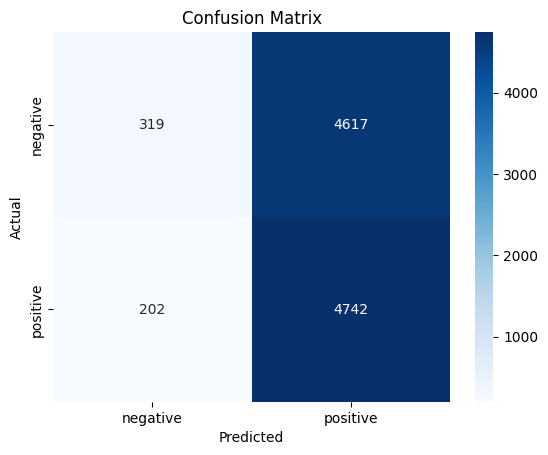

In [95]:
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [96]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode 'negative' -> 0, 'positive' -> 1
y_test_encoded = label_encoder.transform(y_test)

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Progress information
    n_jobs=-1  # Use all available cores
)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train_encoded)

# Best parameters and results
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("\nBest Accuracy:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Decode predictions back to the original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_decoded))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_decoded))


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [06:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters:
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.6}

Best Accuracy:
0.5105273813138982

Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.06      0.11      4936
    positive       0.51      0.96      0.66      4944

    accuracy                           0.51      9880
   macro avg       0.56      0.51      0.39      9880
weighted avg       0.56      0.51      0.39      9880


Confusion Matrix:
[[ 313 4623]
 [ 196 4748]]
